In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
x_= np.linspace(0, 100, 101)



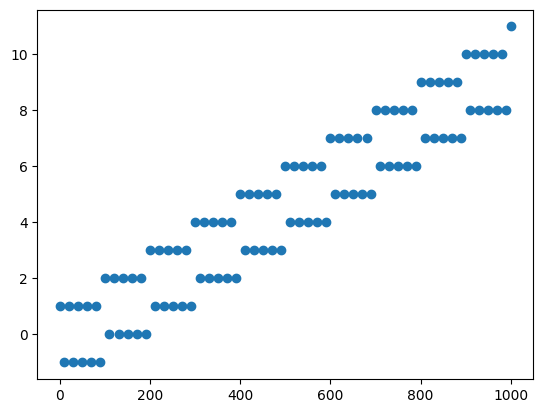

In [10]:
t_ = 10*x_
u_ = np.cos(np.pi*x_) + x_//10
# u_ = np.cos(x_)

plt.figure()
plt.scatter(t_, u_)
plt.show()

In [4]:
def wikipedia_exp_smoothing(x:np.array, tau:np.array):
    s = np.zeros(x.shape)
    prev = 0
    for i, elem in enumerate(x):
        decay = np.exp(-tau[i])
        s[i] = (1-decay) * x[i] + decay * prev
        prev = s[i]
    return s

def custom_exp_smoothing(x:np.array, tau:np.array):
    s = np.zeros(x.shape)
    z = np.zeros(x.shape) 
    s_prev = 0
    z_prev = 0
    for i, elem in enumerate(x):
        decay = np.exp(-tau[i])
        z[i] = 1 + decay * z_prev
        s[i] = (x[i] + decay * z_prev * s_prev) / z[i]
        z_prev = z[i]
        s_prev = s[i]
    return s
    
    

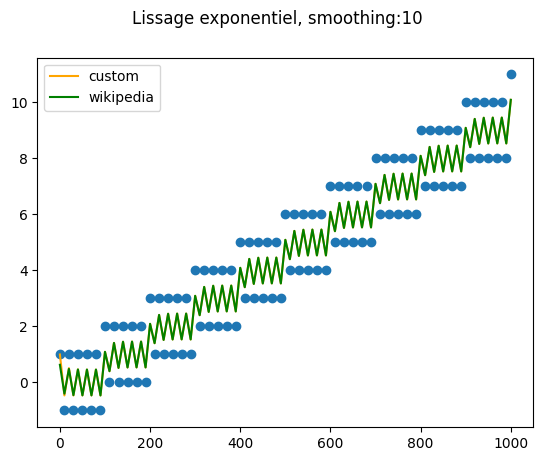

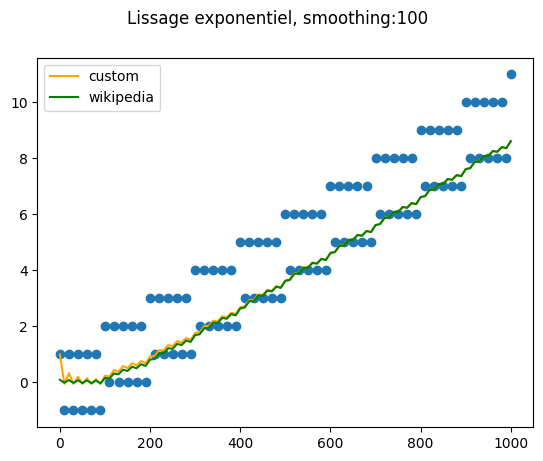

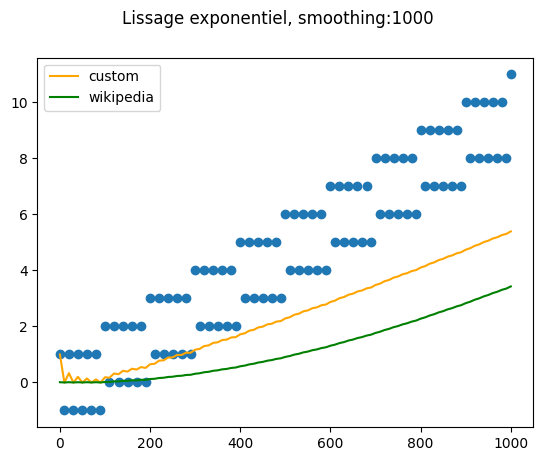

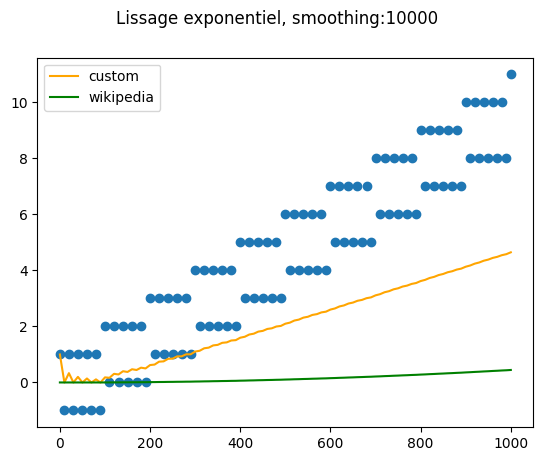

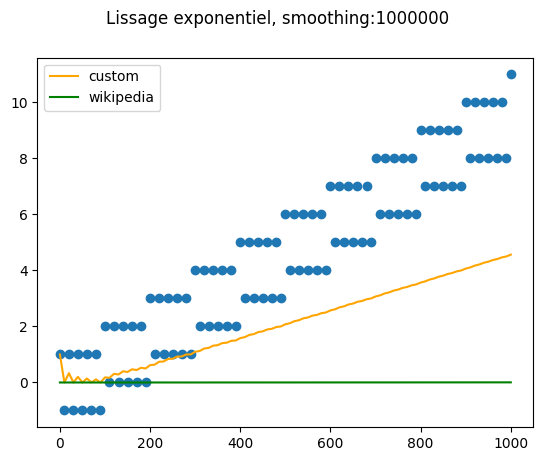

In [11]:
y_ = 10 * np.ones(x_.shape)
t_ = 10*x_
u_ = np.cos(np.pi*x_) + x_//10
for param in [10, 100, 1000, 10000, 1e6]:
    plt.figure()
    plt.suptitle(f"Lissage exponentiel, smoothing:{int(param)}")
    plt.scatter(t_, u_)
    plt.plot(t_, custom_exp_smoothing(x=u_, tau=y_/param), c="orange", label="custom")
    plt.plot(t_, wikipedia_exp_smoothing(x=u_, tau=y_/param), c="green", label="wikipedia")
    plt.legend()
    plt.savefig(f'img/plot_{int(param)}_slow.png')
    plt.show()


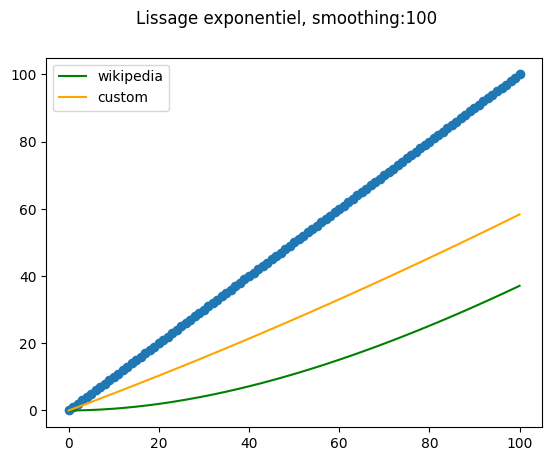

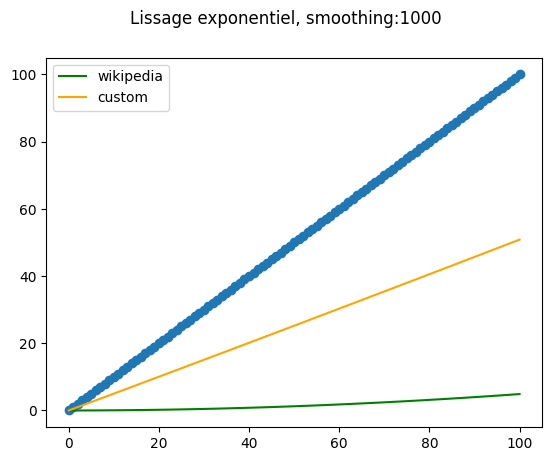

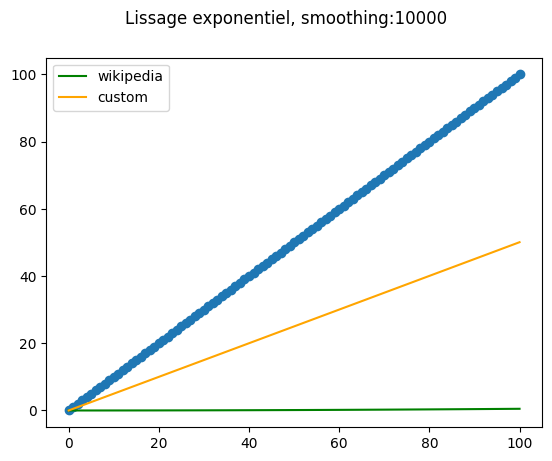

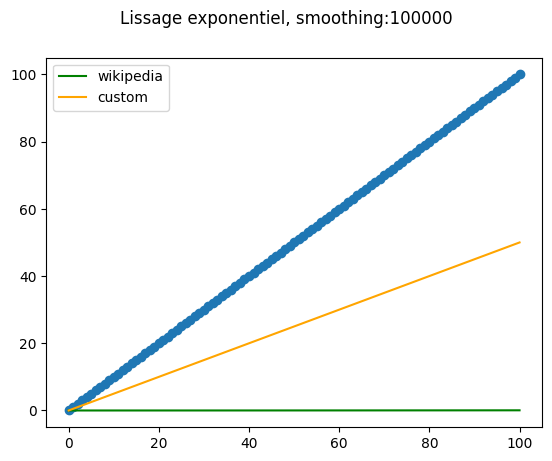

In [14]:
y_ = 1 * np.ones(x_.shape)
t_ = x_
u_ = x_
for param in [100, 1000, 1e4, 1e5]:
    plt.figure()
    plt.suptitle(f"Lissage exponentiel, smoothing:{int(param)}")
    plt.scatter(t_, u_)
    plt.plot(t_, wikipedia_exp_smoothing(x=u_, tau=y_/param), c="green", label="wikipedia")
    plt.plot(t_, custom_exp_smoothing(x=u_, tau=y_/param), c="orange", label="custom")
    plt.legend()
    plt.savefig(f'img/plot_{int(param)}_fast.png')
    plt.show()


In [31]:
print(wikipedia_exp_smoothing(x=u_, tau=y_/param))


[ 0.         -0.02175976  0.02421003 -0.04750696  0.05242634 -0.07724373
  0.0846465  -0.11097216  0.1208681  -0.14869429 -0.03767041 -0.16843222
 -0.01126639 -0.19184169  0.01944731 -0.21895157  0.05444019 -0.24979342
  0.09367934 -0.28440085  0.13713001 -0.32280897  0.18475626 -0.36505378
  0.23652154 -0.41117152  0.29238929 -0.46119815  0.35232352 -0.51516874
 -0.1813413  -0.54895511 -0.1285572  -0.58555098 -0.07063921 -0.62506177
 -0.00769818 -0.66760266  0.06014629 -0.71329643  0.13276802 -0.76227134
  0.2100365  -0.81465885  0.29181902 -0.87059146  0.37798291 -0.93020058
  0.46839755 -0.99361454 -0.43575862 -1.03890341 -0.35386009 -1.08577072
 -0.26565044 -1.13443125 -0.17135526 -1.18511962 -0.07121792 -1.23808598
  0.03450485 -1.29359163  0.14554744 -1.3519044   0.26163987 -1.41329427
  0.38251219 -1.47802902  0.50789869 -1.54637017 -0.76367282 -1.6014719
 -0.65084523 -1.65667615 -0.53029499 -1.71232878 -0.40238526 -1.76880763
 -0.2675078  -1.8265156  -0.12607588 -1.88587346  0.

In [32]:
print(custom_exp_smoothing(x=u_, tau=y_/param))

[ 0.         -0.50549978  0.34866924 -0.51803093  0.42948212 -0.53218148
  0.47346169 -0.54803693  0.50635831 -0.56569238  0.5157008  -0.56518982
  0.52588929 -0.56877567  0.53724618 -0.57548577  0.549971   -0.58484351
  0.56421359 -0.59661049  0.58010399 -0.6106789   0.59776621 -0.62701984
  0.61732539 -0.64565647  0.63891172 -0.66664911  0.66266288 -0.69008657
  0.66262654 -0.68948475  0.66609733 -0.69253141  0.67274922 -0.69889889
  0.68237752 -0.70837939  0.69486446 -0.72085209  0.71015723 -0.73626196
  0.72825352 -0.75460553  0.74919187 -0.77592121  0.77304491 -0.8002826
  0.79991472 -0.82779356  0.79815427 -0.82624755  0.80039316 -0.82872814
  0.8063634  -0.83498758  0.81588969 -0.84486614  0.82886981 -0.85827427
  0.84526089 -0.87517993  0.86506953 -0.89559943  0.88834471 -0.9195908
  0.91517251 -0.94724878  0.94567215 -0.978701    0.94225782 -0.97574843
  0.94343288 -0.97738615  0.94893118 -0.98337319  0.95857635 -0.99355363
  0.97226547 -1.00784184  0.98995725 -1.02621158  1.0